https://slundberg.github.io/shap/notebooks/deep_explainer/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html

In [21]:
from __future__ import print_function

from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
max_features = 20000
max_len = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
x_train.shape, x_test.shape

((25000, 80), (25000, 80))

In [23]:
model_layers = [
    Embedding(max_features, 128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid'),
]
model = Sequential(model_layers)
metrics = ["accuracy"]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
model.summary()

In [24]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 85s 107ms/step - loss: 0.4346 - accuracy: 0.7962 - val_loss: 0.3571 - val_accuracy: 0.8422
Epoch 2/5
782/782 [==============================] - 78s 100ms/step - loss: 0.2551 - accuracy: 0.8996 - val_loss: 0.5366 - val_accuracy: 0.7926
Epoch 3/5
782/782 [==============================] - 74s 95ms/step - loss: 0.1705 - accuracy: 0.9349 - val_loss: 0.4481 - val_accuracy: 0.8264
Epoch 4/5
782/782 [==============================] - 76s 97ms/step - loss: 0.1117 - accuracy: 0.9608 - val_loss: 0.5331 - val_accuracy: 0.8235
Epoch 5/5
782/782 [==============================] - 80s 102ms/step - loss: 0.0771 - accuracy: 0.9735 - val_loss: 0.5999 - val_accuracy: 0.8208


In [25]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.434622,0.79624,0.357055,0.84220
1,0.255069,0.89964,0.536608,0.79256
2,0.170516,0.93492,0.448094,0.82644
3,0.111658,0.96076,0.533126,0.82348
4,0.077148,0.97352,0.599946,0.82076


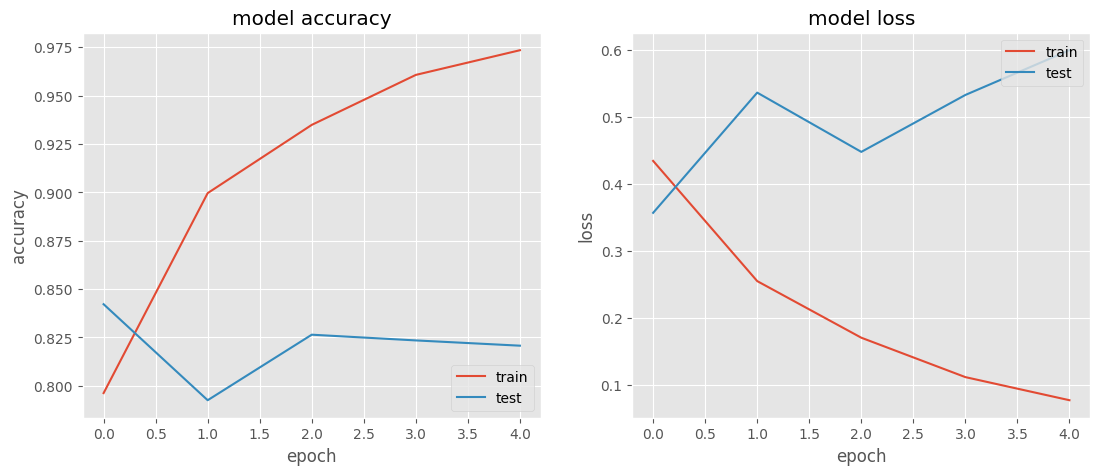

In [33]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

plt.sca(axis[0])
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')

plt.sca(axis[1])
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right');